<a href="https://colab.research.google.com/github/cristianbossolasco/Inflacion-Dolar-Argentina/blob/main/Calculo_de_IPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [3]:
# Inflacion prevista para el proximo mes
def get_inflacion_prevista(porcentaje_provisto, df):
  max_index = df.idxmax()
  valor = df.loc[max_index].values[0][0]

  index_new = max_index[0] + relativedelta(months=1)
  valor_new = round(valor + valor * porcentaje_provisto, 4)

  return index_new, valor_new

def get_data():
  url = 'https://www.indec.gob.ar/ftp/cuadros/economia/sh_ipc_04_25.xls'
  excel_file = pd.ExcelFile(url)
  sheet_name = 'Índices IPC Cobertura Nacional'
  skip_rows = 5  # Omitir las primeras 5 filas
  num_rows = 26  # Leer las siguientes 26 filas
  data = excel_file.parse(sheet_name, skiprows=skip_rows, nrows=num_rows)

  filtro = data['Total nacional'] == 'Nivel general'
  ipc_general = data[filtro].set_index('Total nacional').T


  # Descomentar las dos lineas de abajo si se conoce la inflacion prevista del mes en curso
  index_new, valor_new = get_inflacion_prevista(0.023, ipc_general)
  ipc_general.loc[index_new] = valor_new

  # calculo los % de variacion mensual, trimestral y interanual
  #ipc_general['Variación mensual'] = round(ipc_general['Nivel general'].pct_change() * 100, 1)
  #ipc_general['Variación Timestral'] = round(ipc_general['Nivel general'].pct_change(periods=3) * 100, 1)
  #ipc_general['Variación Anual'] = round(ipc_general['Nivel general'].pct_change(periods=12) * 100, 1)
  for periodos in range(1,13):
    ipc_general[f'Inf_{periodos}'] = round(ipc_general['Nivel general'].pct_change(periods=periodos) * 100, 1)

  # Renombro las columnas
  ipc_general = ipc_general.rename(columns={'Nivel general': 'Valor'})

  return ipc_general

In [4]:
ipc = get_data()
ipc = ipc.reset_index()
ipc = ipc.rename(columns={'index': 'Periodo'})

<ipython-input-3-1a81386cb916>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  index_new = max_index[0] + relativedelta(months=1)


In [5]:
ipc.sort_values(by=['Periodo'], ascending = False).head(36)

Total nacional,Periodo,Valor,Inf_1,Inf_2,Inf_3,Inf_4,Inf_5,Inf_6,Inf_7,Inf_8,Inf_9,Inf_10,Inf_11,Inf_12
100,2025-04-01,8545.4421,2.3,6.1,8.7,11.1,14.1,16.8,20.0,24.1,29.3,34.5,40.7,46.6
99,2025-03-01,8353.3158,3.7,6.2,8.6,11.5,14.2,17.3,21.4,26.4,31.5,37.5,43.3,55.9
98,2025-02-01,8052.9927,2.4,4.7,7.5,10.1,13.1,17.0,21.9,26.8,32.6,38.1,50.3,66.9
97,2025-01-01,7864.1257,2.2,5.0,7.5,10.4,14.2,19.0,23.8,29.5,34.9,46.8,63.0,84.5
96,2024-12-01,7694.0075,2.7,5.2,8.0,11.8,16.4,21.1,26.7,32.0,43.6,59.4,80.5,117.8
95,2024-11-01,7491.4314,2.4,5.2,8.8,13.4,17.9,23.3,28.5,39.8,55.2,75.8,112.0,166.0
94,2024-10-01,7313.9542,2.7,6.3,10.7,15.1,20.4,25.4,36.5,51.6,71.6,107.0,159.7,193.0
93,2024-09-01,7122.2421,3.5,7.8,12.1,17.3,22.2,32.9,47.6,67.1,101.6,152.9,185.3,209.0
92,2024-08-01,6883.4412,4.2,8.4,13.3,18.1,28.5,42.6,61.5,94.8,144.4,175.7,198.6,236.7
91,2024-07-01,6607.7479,4.0,8.8,13.3,23.3,36.9,55.1,87.0,134.6,164.7,186.7,223.2,263.4


<Axes: >

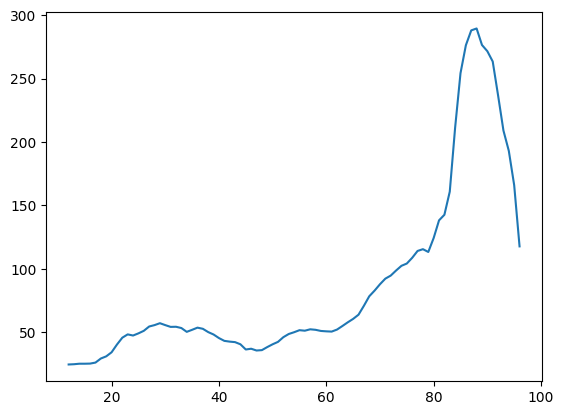

In [ ]:
ipc['Inf_12'].plot()